#### `mnist_1000.csv`에는 1000개의 숫자 손글씨 사진의 픽셀값(28*28)이 저장되어 있다.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.decomposition import PCA # 주성분 분석
from sklearn.preprocessing import StandardScaler # 표준화

data_path = '../data/'

In [4]:
mnist = pd.read_csv(data_path+'mnist_1000.csv')

In [5]:
mnist.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
X = mnist.iloc[:,:-1]

#### 1. 데이터를 np.array로 변환하고 첫 10개의 사진을 프린트 하시오. 

In [14]:
im_train = np.array(X)

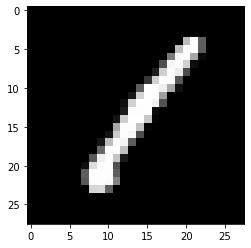

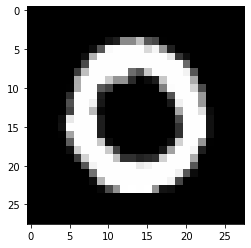

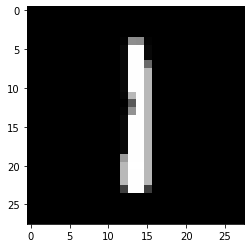

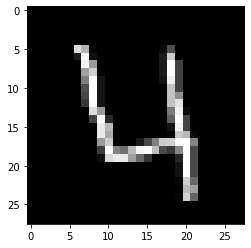

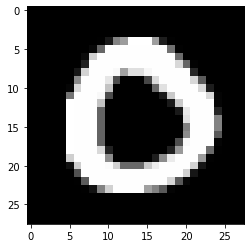

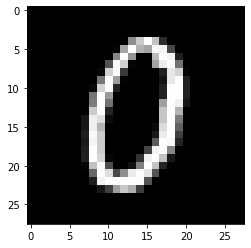

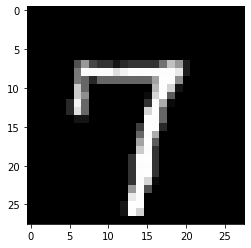

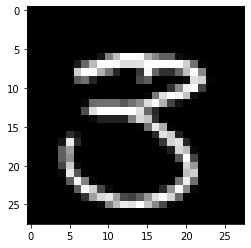

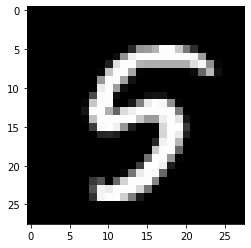

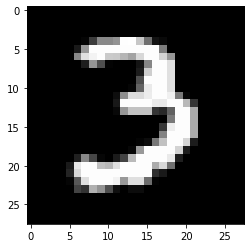

In [15]:
for i in range(10):
    plt.figure(i)
    plt.imshow(np.flip(im_train[i,:].reshape(28, 28), axis=0), cmap="gray")

#### 2. 데이터를 scaling 한 후 90% 이상의 분산을 설명하는 최소의 PC를 사용하여 데이터를 축소하시오. 몇 개의 차원으로 축소되는가? 그 때의 설명된 분산의 비율은 얼마인가? 

In [16]:
scaler = StandardScaler().fit(im_train)
X_scaled = scaler.transform(im_train)

In [18]:
X_scaled.shape

(1000, 784)

In [24]:
pca = PCA(n_components=0.9).fit(X_scaled) # 스케일된 값을 반드시 pca 시킬 것
x_reduced = pca.transform(X_scaled)

In [29]:
pca.explained_variance_ratio_.shape # len(pca.explained_variance_ratio_)

(131,)

In [30]:
len(pca.explained_variance_ratio_)

131

In [28]:
pca.explained_variance_ratio_.sum()

0.9011276862187847

#### 3. 축소된 PC를 사용하여 원래 사진의  공간으로 재변환 하고 scaling 한 데이터 역시 재변환하여 첫 10개의 사진을 프린트하시오. 

In [31]:
x_inverse = pca.inverse_transform(x_reduced) # 축소된 차원을 다시 복원

In [33]:
x_reduced.shape

(1000, 131)

In [32]:
x_inverse.shape # 131개의 차원에서 원래의 784개의 차원으로 복원

(1000, 784)

In [34]:
X_scaled_inverse= scaler.inverse_transform(x_inverse) 
# pca로 되돌린 차원의 값을 대입해서 역방향으로 진행

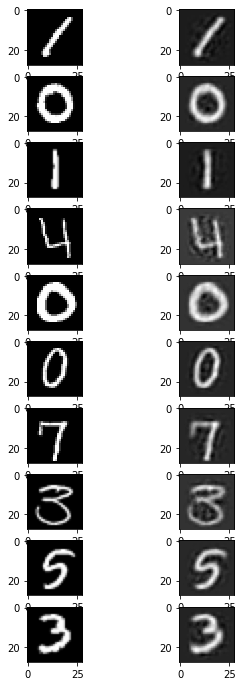

In [35]:
plt.figure(figsize=(5,12))
for i in np.arange(0,10):
    plt.subplot(10,2,2*i+1)
    plt.imshow(np.flip(im_train[i,:].reshape(28, 28),axis=0), cmap="gray") # 원본
    plt.subplot(10,2,2*(i+1))
    plt.imshow(np.flip(X_scaled_inverse[i,:].reshape(28, 28),axis=0), cmap="gray") # 압축하고 다시 원복
    